___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../figures/capa2.png' /></a>
___

# Solução do Projeto de Agrupamento K Means

Neste projeto, tentaremos usar o agrupamento KMeans para agrupar universidades em dois grupos, Privadas e Públicas.

___
É **muito importante observar que, na verdade, temos os rótulos para este conjunto de dados, mas NÃO os usaremos para o algoritmo de agrupamento K-Means, pois esse é um algoritmo de aprendizado não supervisionado.**

Ao usar o algoritmo K-means em circunstâncias normais, é porque você não tem rótulos. Neste caso usaremos os rótulos para tentar ter uma ideia de quão bem o algoritmo funcionou, mas normalmente você não fará isso para K-means, então o relatório de classificação e matriz de confusão no final deste projeto, não realmente não faz sentido em um cenário do mundo real!
___

## Os Dados

Usaremos um conjunto de dados com 777 observações sobre as seguintes 18 variáveis.
* Private: A Fator com valores Não e Sim indicando universidade particular ou pública
* APPs: Número de pedidos recebidos
* Accept: Número de inscrições aceitas
* Enroll: Número de novos alunos matriculados
* Top10perc Perc.: novos alunos dos 10% melhores do H.S. classe
* Top25perc Perc.: novos alunos dos 25% melhores do H.S. classe
* F.Undergrad: Número de alunos de graduação em tempo integral
* P.Undergrad: Número de alunos de graduação em meio período
* Outstate: Mensalidade fora do estado
* Room.Board: Custos de hospedagem e alimentação
* Books: Custos estimados com livros
* Personal: gastos pessoais estimados
* PhD Pct.: Numero do corpo docente com Ph.D.
* Terminal Pct.: Numero do corpo docente com grau terminal
* S.F.Ratio: Proporção aluno/professor
* erc.alumni Pct.: Numero dos ex-alunos que doam
* Expend: Despesas com instrução por aluno
* Grad.Rate: Taxa de graduação

## Importando as bibliotecas

**Importe as bibliotecas usuais tais como o pandas e o seaborn.**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenha os dados

**Leia o arquivo College_Data usando read_csv. Descubra como definir a primeira coluna como índice.**

In [104]:
df = pd.read_csv('College_Data',index_col=0)

**Verifique o head() do dataframe.**

In [105]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Verifique o describe() e head() do dataframe.**

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [107]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA: Analise Exploratória de Dados

## Visualização de Dados

**Crie um scatterplot de Grad.Rate versus Room.Board onde os pontos são coloridos pela coluna Private.**


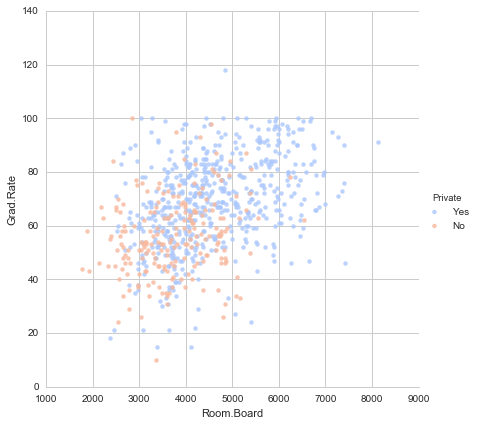

In [111]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

**Crie um scatterplot de F.Undergrad versus Outstate onde os pontos são coloridos pela coluna Private.**

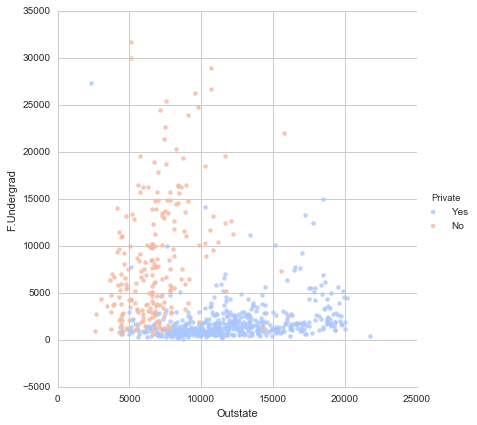

In [112]:
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

**Crie um `stacked histogram` mostrando a taxa de graduação com base na coluna Private. Tente fazer isso usando [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). Se isso for muito complicado, veja se você pode fazer isso apenas usando duas instâncias de pandas.plot (kind = 'hist').**

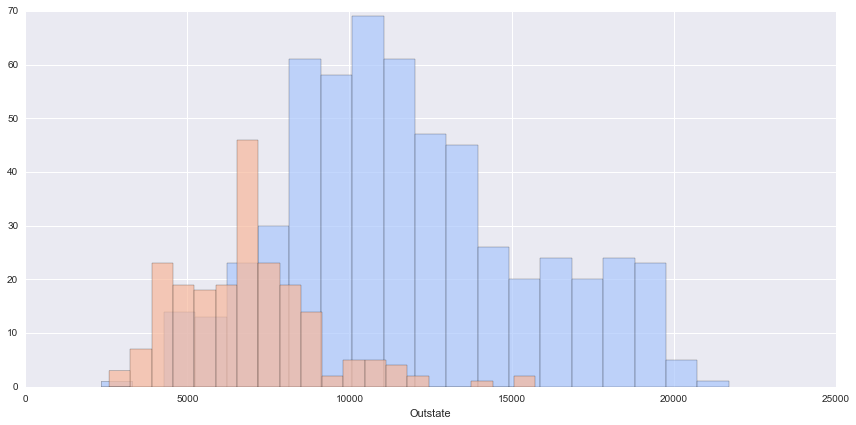

In [109]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**Crie um histograma similar para a coluna Grad.Rate.**

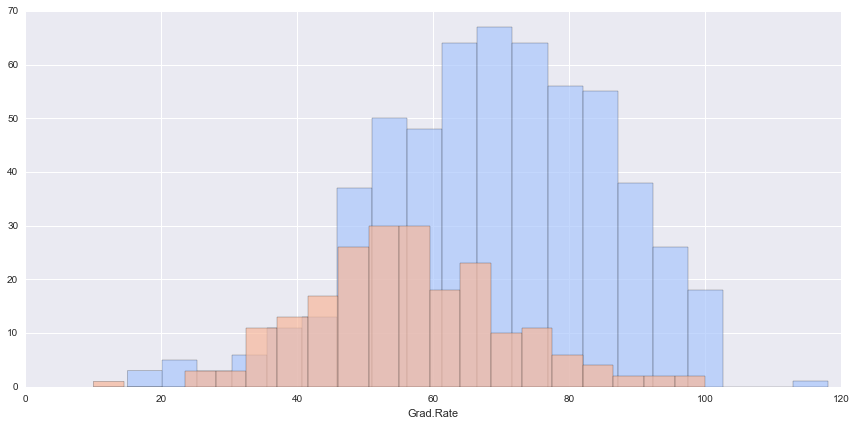

In [110]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

**Preste atenção como parece haver uma escola particular com uma taxa de graduação maior que 100%. Qual é o nome dessa escola?**

In [113]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Ajusta graduation rate desta escola para 100 para que faça sentido. Você pode obter um aviso (não um erro) ao fazer esta operação, então use operações de dataframe ou apenas refaça a visualização do histograma para ter certeza de que realmente foi feito.**

In [93]:
df['Grad.Rate']['Cazenovia College'] = 100

/Users/marci/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


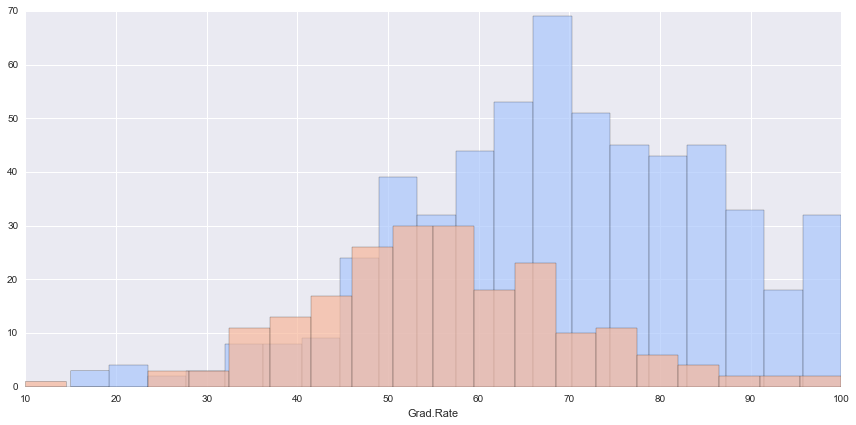

In [95]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## Criando os Clusters K-means

Agora é a hora de criar os rótulos de cluster!

**Importe KMeans do SciKit Learn.**

In [114]:
from sklearn.cluster import KMeans

**Crie um instance do modelo KMeans com 2 clusters.**

In [115]:
kmeans = KMeans(n_clusters=2)

**Ajuste o modelo a todos os dados, exceto pelo rotulo Privada.**

In [116]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

**Quais são os vetores de centro de cluster?**

In [117]:
kmeans.cluster_centers_

array([[  1.81323468e+03,   1.28716592e+03,   4.91044843e+02,
          2.53094170e+01,   5.34708520e+01,   2.18854858e+03,
          5.95458894e+02,   1.03957085e+04,   4.31136472e+03,
          5.41982063e+02,   1.28033632e+03,   7.04424514e+01,
          7.78251121e+01,   1.40997010e+01,   2.31748879e+01,
          8.93204634e+03,   6.51195815e+01],
       [  1.03631389e+04,   6.55089815e+03,   2.56972222e+03,
          4.14907407e+01,   7.02037037e+01,   1.30619352e+04,
          2.46486111e+03,   1.07191759e+04,   4.64347222e+03,
          5.95212963e+02,   1.71420370e+03,   8.63981481e+01,
          9.13333333e+01,   1.40277778e+01,   2.00740741e+01,
          1.41705000e+04,   6.75925926e+01]])

## Evaluação
Não existe uma maneira perfeita de avaliar o agrupamento se você não tiver os rótulos, no entanto, como este é apenas um exercício, temos os rótulos, então aproveitamos isso para avaliar nossos clusters, lembre-se, você geralmente não terá essa sorte no mundo real.

**Crie uma nova coluna para df chamada 'Cluster', que é um 1 para uma escola privada e um 0 para uma escola pública.**

In [118]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [119]:
df['Cluster'] = df['Private'].apply(converter)

In [122]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Crie uma matriz de confusão e um relatório de classificação para ver como o agrupamento Kmeans funcionou sem ter sido fornecido nenhum rótulo.**

In [123]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[138  74]
 [531  34]]
             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



Não muito ruim considerando que o algoritmo está usando puramente os recursos para agrupar as universidades em 2 grupos distintos! Espero que você possa começar a ver como o K Means é útil para agrupar dados não rotulados!